In [1]:
import tensorflow as tf
import os

import cv2
from matplotlib.pyplot import imread
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras.applications.imagenet_utils import decode_predictions
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.offsetbox import OffsetImage, AnnotationBbox

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import preprocess_input
import h5py
from skimage.io import imread
from skimage.transform import resize
import numpy as np
import os


# model =  tf.keras.models.load_model('model_scratch.h5')
# model.summary()

# input_ = model.layers[0].input
# output_ = model.layers[-2].output
# base_model = Model(input_, output_)
# base_model.save('last_model_scratch_without_head.h5')
base_model =  tf.keras.models.load_model('last_model_scratch_without_head.h5')
# del model

In [24]:
# train_images, train_labels = extract_features(train_generator, 160, base_model, shape=(256,))
# test_images, test_labels   = extract_features(test_generator, 80, base_model, shape=(256,))

# print("Features du jeux d'entraînement: ", train_images.shape)
# print("Features du jeux de test:", test_images.shape)

ROOTDIR = '../datasets/near_duplicates/'
IMAGESDIR = ROOTDIR + 'data_tri_resize/'
TESTDIR = ROOTDIR + 'data_test_resize/'
IMAGES_CLASSES = [
    'bateaux',
    'cartes',
    'fossiles',
    'images_sismiques',
    'roche',
    'tomographies_sismiques',
    'Schemas_sismiques',
    'well_logs'
]

lens = [len(os.listdir(IMAGESDIR + CLASSDIR)) for CLASSDIR in IMAGES_CLASSES]

images_paths = [[IMAGESDIR + classdir + '/' + path for path in sorted(os.listdir(IMAGESDIR + classdir))] for classdir in IMAGES_CLASSES]
images_test_paths = [[TESTDIR + classdir + '/' + path for path in sorted(os.listdir(TESTDIR + classdir))] for classdir in IMAGES_CLASSES]

images_paths = [item for sublist in images_paths for item in sublist]
images_test_paths = [item for sublist in images_test_paths for item in sublist]
images_paths.extend(images_test_paths)
paths = images_paths

# batch_size = 32
# out_tensors = np.zeros((len(paths), 256), dtype="float32")
# print(out_tensors.shape)
# for idx in range(len(paths) // batch_size + 1):
#     batch_bgn = idx * batch_size
#     batch_end = min((idx+1) * batch_size, len(paths))
#     imgs = []
#     for path in paths[batch_bgn:batch_end]:
#         img = imread(path)
#         img = resize(img, (600,600)).astype("float32")
#         img = preprocess_input(img[np.newaxis])
#         imgs.append(img)
#     try:
#         batch_tensor = np.vstack(imgs)
#         print("tensor", idx, "with shape",batch_tensor.shape)
#         out_tensor = base_model.predict(batch_tensor, batch_size=32)
#         print("output shape:", out_tensor.shape)
#         out_tensors[batch_bgn:batch_end, :] = out_tensor
#     except:
#         print("No img in this batch")
# print("Dimension de la représentation :", out_tensors.shape)

# Sérialiser les représentations
# h5f = h5py.File('images_embedding_scratch.h5', 'w')
# h5f.create_dataset('img_emb', data=out_tensors)
# h5f.close()
# 

def most_similar_images(image_index, top_n=5):
    
    # distances entre les images
    dists = np.linalg.norm(out_tensors - out_tensors[image_index], axis = 1)
        
    sorted_dists = np.argsort(dists)
    return sorted_dists[:top_n]

# sanity check
# image_index = 3

# images_similar = most_similar_images(image_index, top_n=10)

def get_index_from_path(path):
    new_path = IMAGESDIR + path
    try:
        id = paths.index(new_path)
    except:
        new_path = TESTDIR + path
        id = paths.index(new_path)
    return id

def get_indexes_of_class(classname):
    indexes = []
    for i in range(len(paths)):
        if paths[i].split("/")[-2] == classname:
            indexes.append(i)
    return indexes
    
def display_image(image):
    plt.figure(figsize=(10,10))
    plt.imshow(imread(image))
    
# affichage 
# result = [display_image(images_paths[image]) for image in images_similar]


<HDF5 dataset "img_emb": shape (240, 256), type "<f4">


[None, None, None, None, None, None, None]

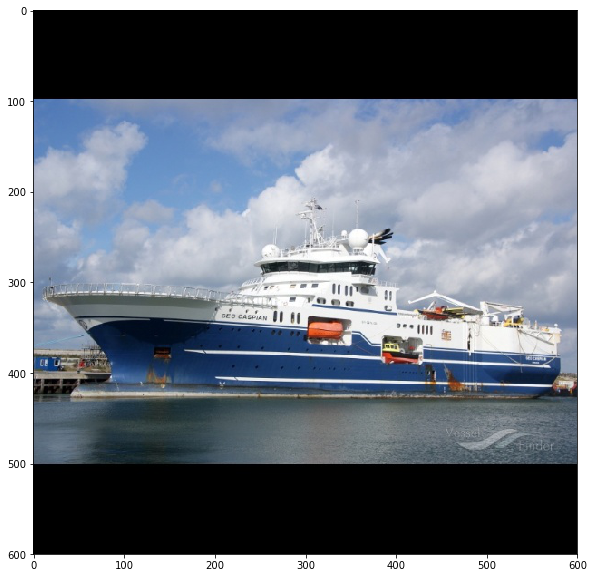

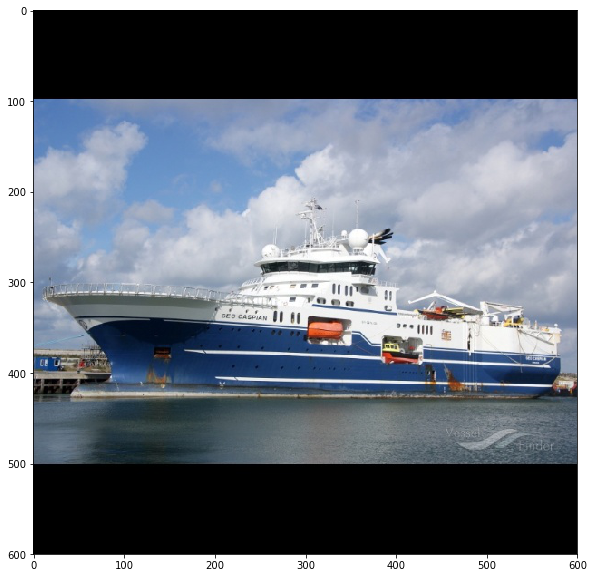

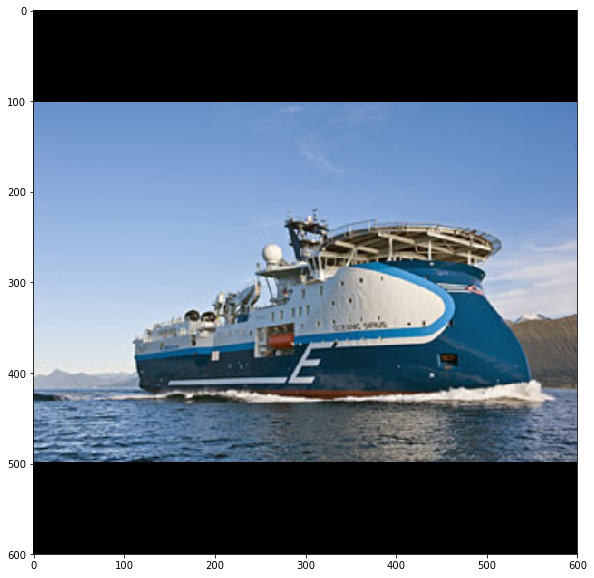

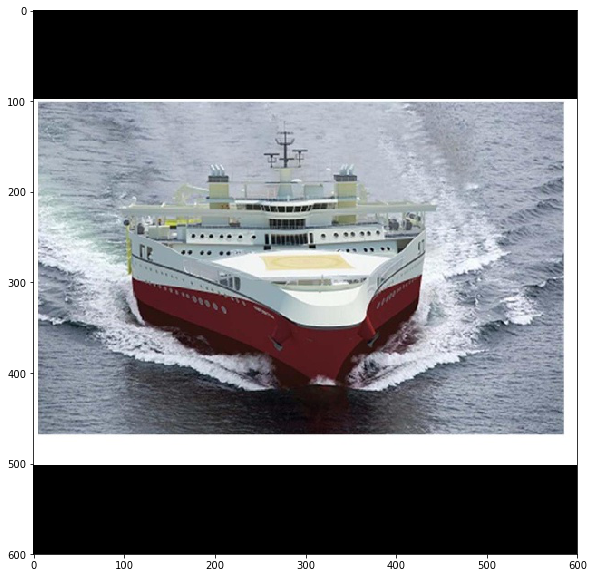

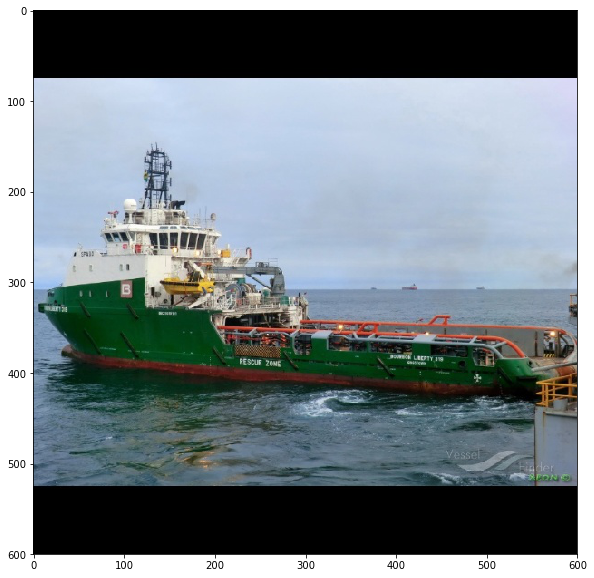

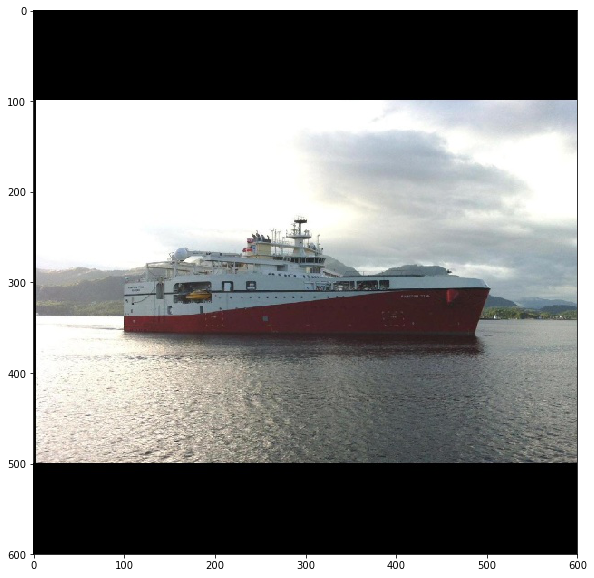

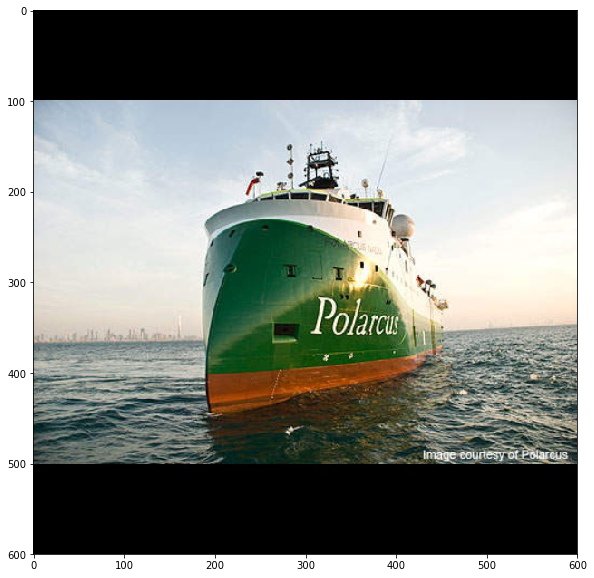

In [38]:
image_path = "bateaux/00135.jpg"
def get_similar_images(image_path, show=False):
    image_index = get_index_from_path(image_path)

    # base_model =  tf.keras.models.load_model('last_model_scratch_without_head.h5')

    h5f = h5py.File('images_embedding_scratch.h5', 'r')
    out_tensors = h5f['img_emb']
    print(out_tensors)

    indexes = get_indexes_of_class(image_path.split("/")[0])
    images_similar = most_similar_images(image_index, top_n=10)
    if show:
        result = [(display_image(images_paths[image]) if image in indexes else None) for image in images_similar]
    result = []
    for image in images_similar:
        if image in indexes:
            result.append(images_paths[image])
    return result

[display_image(image) for image in get_similar_images(image_path)]